In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

I wanted to explore how parties distribute their tickets, so I have selected some parties to understand how the tickets are distributed among the genders.

In [47]:
import pandas as pd

parties_of_interest = ['NCP', 'BSP', 'INC', 'AAAP', 'BJP', 'CPM', 'AITC', 'SHS', 'SP', 'CPI']
df = pd.read_csv("Elections_2019.csv")

gender_mapping = {'F': 'Female', 'FEMALE': 'Female', 'M': 'Male', 'MALE': 'Male', 'O': 'Other'}
df['Sex'] = df['Sex'].map(gender_mapping)

df_filtered = df[df['Party'].isin(parties_of_interest)]

party_gender_distribution = df_filtered.groupby(['Party', 'Sex'])['Candidate'].count().reset_index()

gender_distribution_pivot = party_gender_distribution.pivot_table(index='Party', columns='Sex', values='Candidate', fill_value=0)
gender_distribution_pivot['Total'] = gender_distribution_pivot['Female'] + gender_distribution_pivot['Male'] + gender_distribution_pivot['Other']
print(gender_distribution_pivot)


Sex    Female  Male  Other  Total
Party                            
AAAP        3    31      1     35
AITC       23    39      0     62
BJP        55   382      0    437
BSP        24   359      0    383
CPI         4    45      0     49
CPM        10    59      0     69
INC        54   368      0    422
NCP         1    34      0     35
SHS        12    86      0     98
SP          6    43      0     49


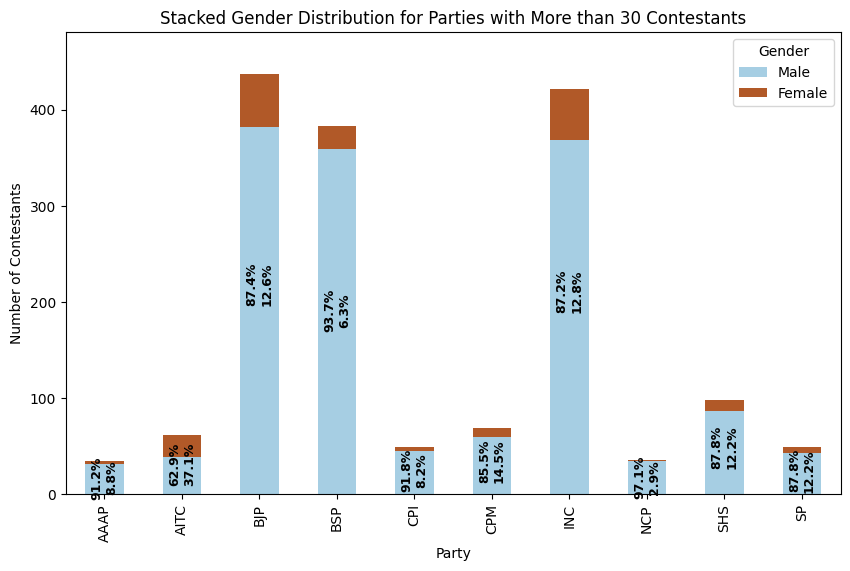

In [48]:
# Calculate percentages for male and female
total_contestants = gender_distribution_pivot['Male'] + gender_distribution_pivot['Female']
male_percentages = (gender_distribution_pivot['Male'] / total_contestants) * 100
female_percentages = (gender_distribution_pivot['Female'] / total_contestants) * 100

# Create a new DataFrame with only 'Male' and 'Female' columns
gender_distribution_pivot_filtered = gender_distribution_pivot[['Male', 'Female']]

ax = gender_distribution_pivot_filtered.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Stacked Gender Distribution for Parties with More than 30 Contestants')
plt.xlabel('Party')
plt.ylabel('Number of Contestants')
plt.legend(title='Gender')

for i, party in enumerate(gender_distribution_pivot_filtered.index):
    male_percentage = male_percentages[i]
    female_percentage = female_percentages[i]
    total_candidates = total_contestants[i]
    # print(total_candidates[i] / 2)
    x_position = i
    y_position = total_candidates / 2  

    ax.text(x_position, y_position, f"{male_percentage:.1f}%\n{female_percentage:.1f}%", 
            ha='center', va='center', fontsize=9, fontweight='bold', rotation='vertical')

ax.set_ylim(0, max(total_contestants) * 1.1)
plt.show()


In [58]:
winning_candidates = df[df["Position"] == 1]
# Group candidates by Party and Sex and get the count of male and female candidates
party_sex_counts = winning_candidates.groupby(["Party", "Sex"]).size().unstack(fill_value=0)
# party_sex_counts = party_sex_counts.drop(columns="MA LE")
# Sum the counts to get the total number of male and female candidates each party fielded
party_sex_counts["Total"] = party_sex_counts.sum(axis=1)
party_sex_counts_listed = party_sex_counts.loc[parties_of_interest]
print(party_sex_counts_listed)
# print(party_sex_counts)


Sex    Female  Male  Total
Party                     
NCP         1     5      6
BSP         1     9     10
INC         6    46     52
AAAP        0     1      1
BJP        41   262    303
CPM         0     3      3
AITC        9    13     22
SHS         1    17     18
SP          0     5      5
CPI         0     2      2


In [56]:

# gender_distribution_pivot_listed = filtered_gender_distribution.loc[common_parties]

# Calculate the percentage of male and female candidates who won from the number fielded by each party
winning_percentage_male = (party_sex_counts_listed["Male"] / gender_distribution_pivot["Male"]).round(2) * 100
winning_percentage_female = (party_sex_counts_listed["Female"] / gender_distribution_pivot["Female"]).round(2) * 100
winning_percentage_df = pd.DataFrame({
    "WinningPercentageMale": winning_percentage_male,
    "WinningPercentageFemale": winning_percentage_female
})
print(winning_percentage_df)


       WinningPercentageMale  WinningPercentageFemale
Party                                                
AAAP                     3.0                      0.0
AITC                    33.0                     39.0
BJP                     69.0                     75.0
BSP                      3.0                      4.0
CPI                      4.0                      0.0
CPM                      5.0                      0.0
INC                     12.0                     11.0
NCP                     15.0                    100.0
SHS                     20.0                      8.0
SP                      12.0                      0.0


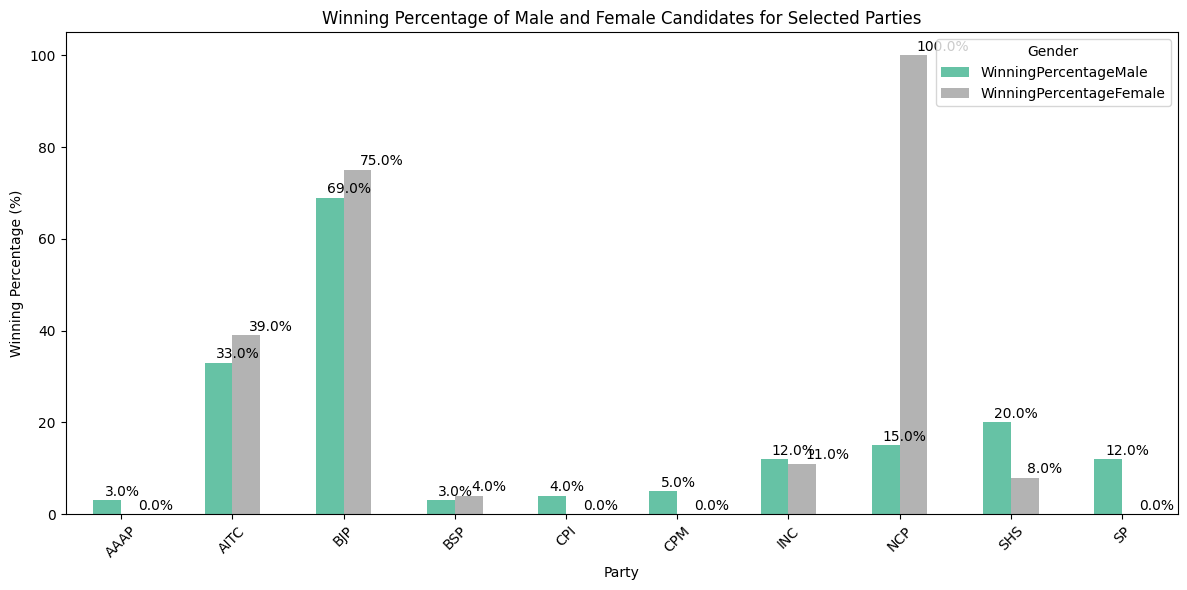

In [57]:
ax = winning_percentage_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')

# Set plot properties
plt.title('Winning Percentage of Male and Female Candidates for Selected Parties')
plt.xlabel('Party')
plt.ylabel('Winning Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Annotate the bars with percentages (above each bar)
for i, party in enumerate(winning_percentage_df.index):
    male_percentage = winning_percentage_df.loc[party, "WinningPercentageMale"]
    female_percentage = winning_percentage_df.loc[party, "WinningPercentageFemale"]

    ax.annotate(f"{male_percentage:.1f}%", xy=(i - 0.15, male_percentage + 1), fontsize=10, color='black')
    ax.annotate(f"{female_percentage:.1f}%", xy=(i + 0.15, female_percentage + 1), fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()